In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1 = pd.read_excel(r'C:\Users\ratho\Desktop\MMA subs\823\DMMA823_AssignmentData_topost.xlsx')

In [3]:
df = df1[['Date', 'MMAX']]

In [4]:
df.columns=["Month","Stock"]
df.head()

,Month,Stock
0,1970-01-01,33.482319
1,1970-01-02,34.008343
2,1970-01-03,33.785179
3,1970-01-04,31.489799
4,1970-01-05,32.023800


In [5]:
df.drop(1140, axis=0, inplace=True)

C:\Users\ratho\AppData\Local\Temp\ipykernel_11648\1780429227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(1140, axis=0, inplace=True)


In [6]:
df['Month'] = pd.to_datetime(df['Month'])

C:\Users\ratho\AppData\Local\Temp\ipykernel_11648\3666255603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = pd.to_datetime(df['Month'])


In [7]:
df.set_index('Month', inplace=True)

<AxesSubplot:xlabel='Month'>

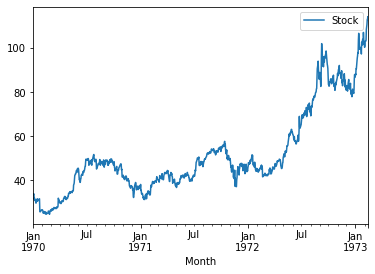

In [8]:
df.plot()

In [9]:
# Stationarity test

from statsmodels.tsa.stattools import adfuller

C:\Users\ratho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\ratho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [10]:
test_result=adfuller(df['Stock'])

In [11]:
test_result

(1.0199675059221727,
 0.9944722243653787,
 1,
 1138,
 {'1%': -3.4361093249345402,
  '5%': -2.8640831032339706,
  '10%': -2.5681240143809787},
 3759.8794976150502)

In [12]:

def adfuller_test(MMAX):
    result=adfuller(MMAX)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [13]:
adfuller_test(df['Stock'])

ADF Test Statistic : 1.0199675059221727
p-value : 0.9944722243653787
#Lags Used : 1
Number of Observations Used : 1138
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [14]:
df['Stock First Difference'] = df['Stock'] - df['Stock'].shift(1)

C:\Users\ratho\AppData\Local\Temp\ipykernel_11648\3846330005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Stock First Difference'] = df['Stock'] - df['Stock'].shift(1)


In [15]:
df['Stock'].shift(1)

Month
1970-01-01           NaN
1970-01-02     33.482319
1970-01-03     34.008343
1970-01-04     33.785179
1970-01-05     31.489799
                 ...    
1973-02-09    109.491325
1973-02-10    110.593086
1973-02-11    112.766838
1973-02-12    112.995125
1973-02-13    114.146523
Name: Stock, Length: 1140, dtype: float64

In [16]:
df['Seasonal First Difference']=df['Stock']-df['Stock'].shift(12)

C:\Users\ratho\AppData\Local\Temp\ipykernel_11648\783337259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Seasonal First Difference']=df['Stock']-df['Stock'].shift(12)


In [17]:
df.head(14)

,Stock,Stock First Difference,Seasonal First Difference
Month,,,
1970-01-01,33.482319,NaN,NaN
1970-01-02,34.008343,0.526024,NaN
1970-01-03,33.785179,-0.223164,NaN
1970-01-04,31.489799,-2.295380,NaN
1970-01-05,32.023800,0.534000,NaN
1970-01-06,31.011595,-1.012205,NaN
1970-01-07,30.884079,-0.127516,NaN
1970-01-08,30.756557,-0.127522,NaN
1970-01-09,31.099262,0.342705,NaN


In [18]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -6.234242088149093
p-value : 4.869292220873053e-08
#Lags Used : 22
Number of Observations Used : 1105
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

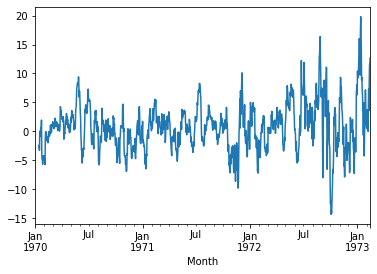

In [19]:
df['Seasonal First Difference'].plot()

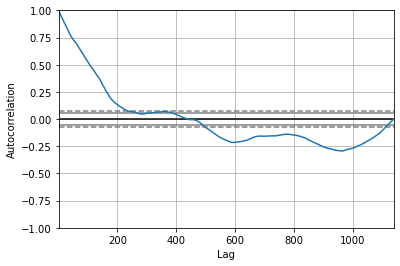

In [20]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Stock'])
plt.show()

In [21]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [22]:
!pip install statsmodels==0.12.1
import statsmodels.api as sm   

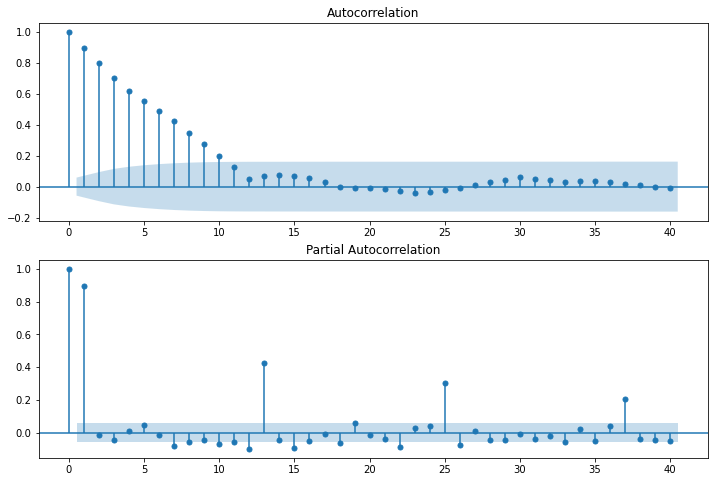

In [23]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [24]:
#AR p = 2 d=1 q = 11
from statsmodels.tsa.arima.model.ARIMA import ARIMA

ModuleNotFoundError: No module named 'statsmodels.tsa.arima.model.ARIMA'; 'statsmodels.tsa.arima.model' is not a package

In [ ]:
model=ARIMA(df['Stock'],order=(2,1,11))
model_fit=model.fit()